In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [100]:
#Loading the dataset
data = pd.read_csv("dataset.csv")
data.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2


Pre-Processing

In [101]:
print(data['location:log_longitude_range'].isna().sum())
print(data['location:log_latitude_range'].isna().sum())


994
994


In [102]:
data_new =data.dropna(subset = ['location:log_longitude_range' , 'location:log_latitude_range'] , how = 'any')

In [103]:
print(data_new['location:log_longitude_range'].isna().sum())
print(data_new['location:log_latitude_range'].isna().sum())

0
0


In [104]:
X = data_new[['location:log_latitude_range' , 'location:log_longitude_range']]
#scaler = StandardScaler()

#X = scaler.fit_transform(X)
X.dtypes

location:log_latitude_range     float64
location:log_longitude_range    float64
dtype: object

In [105]:
X.isna().sum()

location:log_latitude_range     0
location:log_longitude_range    0
dtype: int64

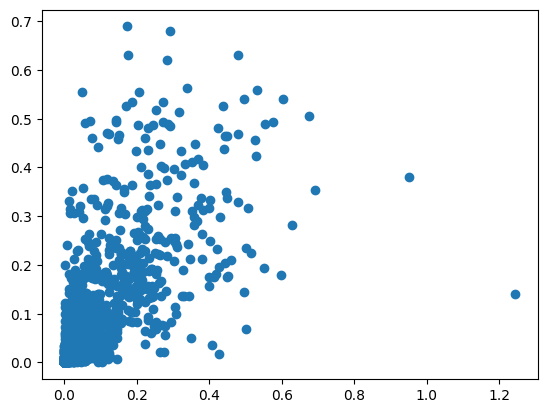

In [106]:
plt.scatter(X['location:log_latitude_range'] , X['location:log_longitude_range'])
plt.show()

Q 1

Clustering

In [107]:
data_new =data_new[['location:log_longitude_range' , 'location:log_latitude_range']].dropna()

In [96]:
print(data_new['location:log_longitude_range'].isnull().sum())
print(data_new['location:log_latitude_range'].isnull().sum())

0
0


In [118]:
kmeans = KMeans(n_clusters=3 , random_state = 0 , n_init = 'auto').fit(data_new)
data_new['cluster'] = kmeans.fit_predict(data_new)

In [114]:
data_new.shape

(2966, 2)

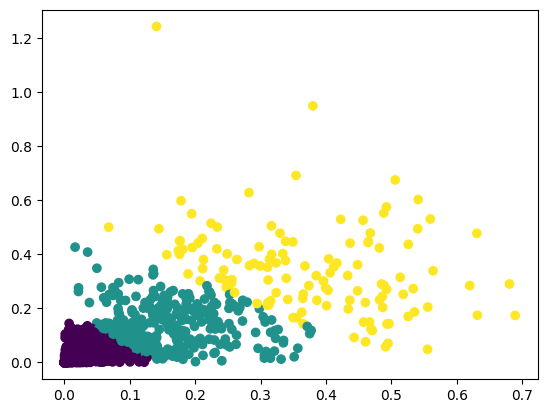

In [115]:
plt.scatter(data_new['location:log_longitude_range'], data_new['location:log_latitude_range'], c=kmeans.labels_)
plt.show()

Question 2

In [123]:
data_with_clusters = data.merge(data_new[['cluster']], left_index=True, right_index=True, how='left')
activity_columns = ['label:SITTING', 'label:LYING_DOWN', 'label:FIX_running', 'label:FIX_walking', 'label:OR_standing']

activity_data_with_clusters = data_with_clusters[activity_columns + ['cluster']]


activity_data_with_clusters = activity_data_with_clusters.fillna(0)

# Sum the activities per cluster
activity_summary_with_clusters = activity_data_with_clusters.groupby('cluster').sum()

# Convert counts to percentages for each cluster
activity_percentage_with_clusters = activity_summary_with_clusters.div(activity_summary_with_clusters.sum(axis=1), axis=0) * 100
activity_percentage_with_clusters

,label:SITTING,label:LYING_DOWN,label:FIX_running,label:FIX_walking,label:OR_standing
cluster,,,,,
0.0,57.088792,33.304221,0.058224,2.154294,7.394469
1.0,71.084337,0.301205,0.903614,19.879518,7.831325
2.0,50.000000,0.000000,1.785714,44.642857,3.571429


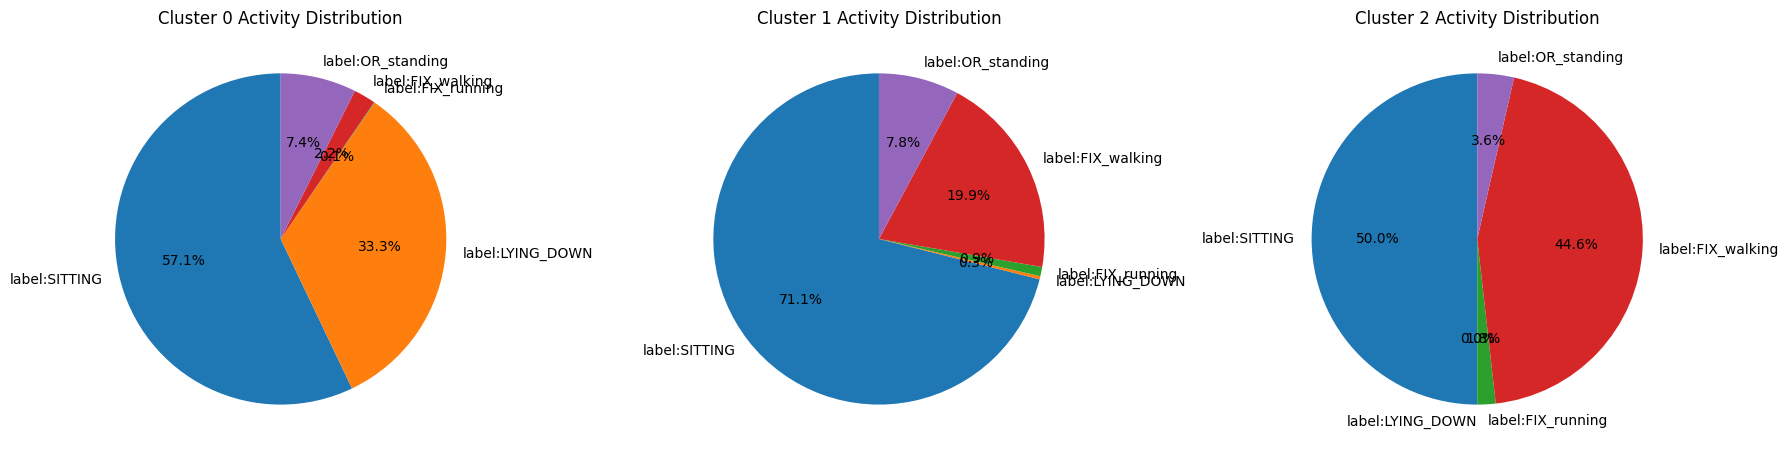

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axes.flat):
    cluster_data = activity_percentage_with_clusters.loc[i]
    ax.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i} Activity Distribution')

plt.tight_layout()
plt.show()